# Plot della curva a rosa


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
b = 5

theta = np.linspace(0, 2*np.pi, 500)
r = np.sin(b*theta)

In [14]:
x = r*np.cos(theta)
y = r*np.sin(theta)

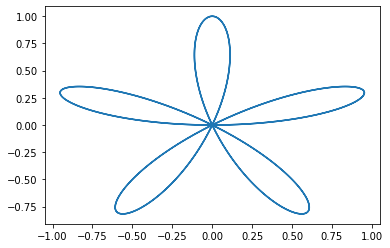

In [15]:
fig, ax = plt.subplots( subplot_kw = {"projection": "rectilinear"}  )

ax.plot(x, y)

plt.show()

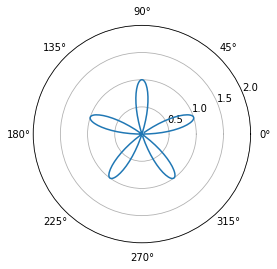

In [19]:
fig, ax = plt.subplots( subplot_kw = {"projection": "polar"}  )

ax.grid(True)
ax.plot(theta, r)

# ACHTUNG! matplotlib usa un offset per il raggio, che decide in base a criteri interni
r_offset = 0.0
ax.set_rorigin(r_offset)

ax.set_rticks([0.5, 1, 1.5, 2.0])

plt.show()

# Vettori applicati e triedro di Frenet

In [28]:
import sympy

# Definiamo funzioni per generare derivate di vettori normalizzati

def norm_symb(v):
    return sympy.sqrt(v[0]**2 + v[1]**2 + v[2]**2)

def normalize_symb(v):
    # norma del vettore
    n = norm_symb(v)
    # vettore vuoto
    v_norm = []
    # riempio il vettore 
    for vi in v:
        v_norm.append(vi/n) # divido per la norma
    # restituisco il versore
    return v_norm

def diff_vec(r, t):
    vx = sympy.diff(r[0], t)
    vy = sympy.diff(r[1], t)
    vz = sympy.diff(r[2], t)
    return [vx, vy, vz]

def diff_vec_norm(r,t):
    return normalize_symb(  diff_vec(r,t)  )


In [30]:
t = sympy.symbols("t")
x = sympy.cos(t)
y = sympy.sin(t)
z = t

r = [x,y,z] # r(t)

T = diff_vec_norm(r, t)
display(  sympy.simplify(T[0])  ) 
display(T[1])
display(T[2])


-sqrt(2)*sin(t)/2

cos(t)/sqrt(sin(t)**2 + cos(t)**2 + 1)

1/sqrt(sin(t)**2 + cos(t)**2 + 1)

In [32]:
def fren_T(x, y, z, t):
    return diff_vec_norm([x,y,z], t)

def fren_N(x,y,z, t):
    T = fren_T(x, y, z, t)
    return diff_vec_norm(T, t)

def fren_B(x, y, z, t):
    # creiamo dei vettori in sympy per T e N
    T = sympy.Matrix( fren_T(x,y,z,t)  )
    N = sympy.Matrix( fren_N(x,y,z, t) )
    # facciamo il prodotto vettoriale
    Bm = T.cross(N) # prodotto vettoriale T x N
    # creiamo una lista vuota per le componenti di B
    B = []
    # riempiamo la lista
    n = Bm.shape[0] # numero di righe della matrice
    for i in range(n):
        B.append(Bm[i])
    # restiuiamo la lista (che è il versore B)
    return B


In [35]:
t = sympy.symbols("t")
x = sympy.cos(t)
y = sympy.sin(t)
z = t

B = fren_B(x, y, z, t)

display( sympy.simplify(B[0]) ) 
display( sympy.simplify(B[1]) ) 
display( sympy.simplify(B[2]) ) 



sqrt(2)*sin(t)/2

-sqrt(2)*cos(t)/2

sqrt(2)/2

# Esercizio

Verificare che T, N, B sono ortogonali tra di loro.

In [41]:
def get_3D_segment(A, B, n=100): # n points between A and B        
    x = np.linspace(A[0], B[0], n)
    y = np.linspace(A[1], B[1], n)
    z = np.linspace(A[2], B[2], n)
    return [x, y, z]

def vec_segment(w, x, y, z, t, t0):
    # creo il vettore del primo punto
    x0 = float(x.subs(t, t0).evalf())
    y0 = float(y.subs(t, t0).evalf())
    z0 = float(z.subs(t, t0).evalf())
    p0 = np.array([x0, y0, z0]) # primo punto
    # creo il vettore che vado ad applicare
    v = np.zeros(3) #[0,0,0]
    v[0] = float(w[0].subs(t, t0).evalf())
    v[1] = float(w[1].subs(t, t0).evalf())
    v[2] = float(w[2].subs(t, t0).evalf())
    # creo la lista di punti
    p1 = p0 + v # secondo punto
    return get_3D_segment(p0, p1)

def vec_fren_T(x,y,z, t, t0):
    T = fren_T(x,y,z, t)
    return vec_segment(T, x, y, z, t, t0)


In [42]:
Omega = 30
H = 3
step_h = 30
t_max = 2*H/step_h
t0 = (8/10)*t_max


In [43]:
t_symb = sympy.symbols("t")
xh_symb = H*sympy.cos(Omega*t_symb)
yh_symb = H*sympy.sin(Omega*t_symb)
zh_symb = step_h*t_symb

In [44]:
th = np.linspace(0, t_max, 100)

xh = H*np.cos(Omega*th)
yh = H*np.sin(Omega*th)
zh = step_h*th

In [45]:
Tf = vec_fren_T(xh_symb, yh_symb, zh_symb, t_symb, t0)

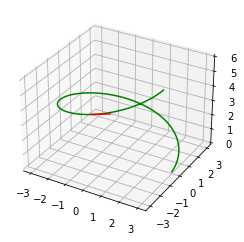

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot(xh, yh, zh, color="green")
ax.plot(Tf[0], Tf[1], Tf[2], color="red")


plt.show()
